# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns



# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
#Type your code here
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/hasil_clustering.csv')


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
#Type your code here
# Prepare features and target
X = df.drop(['Potential_Fraud', 'TransactionTime'], axis=1)
y = df['Potential_Fraud']


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
# Preprocessing pipeline
preprocessor = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
])


In [ ]:
# Apply preprocessing
X_train_res, y_train_res = preprocessor.fit_resample(X_train, y_train)
X_test_scaled = preprocessor.named_steps['scaler'].transform(X_test)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train_res, y_train_res)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='euclidean'
)
knn_model.fit(X_train_res, y_train_res)

KNeighborsClassifier(metric='euclidean', weights='distance')

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
# Buat prediksi
rf_pred = rf_model.predict(X_test_scaled)
rf_prob = rf_model.predict_proba(X_test_scaled)[:, 1]


In [ ]:
# Tetapkan prediksi ke rf_test_pred
rf_test_pred = rf_pred

In [ ]:
#Type your code here
# Hitung metrik evaluasi
rf_accuracy = accuracy_score(y_test, rf_test_pred)
rf_f1 = f1_score(y_test, rf_test_pred)
rf_precision = precision_score(y_test, rf_test_pred)
rf_recall = recall_score(y_test, rf_test_pred)


In [ ]:
print("Hasil Prediksi Random Forest:")
print(f"- Accuracy: {rf_accuracy:.4f}")
print(f"- F1-Score: {rf_f1:.4f}")
print(f"- Precision: {rf_precision:.4f}")
print(f"- Recall: {rf_recall:.4f}")
print(f"- ROC AUC: {roc_auc_score(y_test, rf_prob):.4f}")

Hasil Prediksi Random Forest:
- Accuracy: 0.9894
- F1-Score: 0.7895
- Precision: 0.7143
- Recall: 0.8824
- ROC AUC: 0.9978


Accuracy 98.94%
Model benar memprediksi 98.94% kasus

Peringatan: Data sangat tidak seimbang (hanya 0.8% fraud) - akurasi bisa menyesatkan.

Precision 71.43%

Dari semua yang diprediksi fraud, 71.43% benar
Artinya: 28.57% false alarm (transaksi normal dikira fraud).

Recall 88.24%
Berhasil deteksi 88.24% fraud yang ada

Masalah: Masih ada 11.76% fraud terlewat (risiko tinggi).

F1-Score 0.7895
Keseimbangan baik antara precision dan recall

Lebih relevan daripada accuracy untuk data tidak seimbang.

ROC AUC 99.78%
Klasifikasi hampir sempurna

Sangat baik membedakan transaksi normal dan fraud.

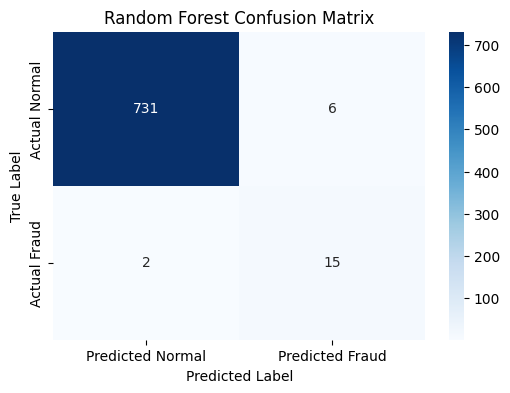

In [ ]:
# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Model Random Forest memiliki kinerja yang baik dalam mendeteksi transaksi penipuan, terutama dalam hal recall. Model berhasil mendeteksi sebagian besar transaksi penipuan yang sebenarnya terjadi. Namun, presisi model masih perlu ditingkatkan untuk mengurangi jumlah false positive (transaksi normal yang diprediksi sebagai penipuan).

In [ ]:
# Prediksi pada data uji
knn_test_pred = knn_model.predict(X_test_scaled)
knn_test_prob = knn_model.predict_proba(X_test_scaled)[:, 1]



In [ ]:

# Hitung metrik evaluasi
knn_accuracy = accuracy_score(y_test, knn_test_pred)
knn_f1 = f1_score(y_test, knn_test_pred)
knn_precision = precision_score(y_test, knn_test_pred)
knn_recall = recall_score(y_test, knn_test_pred)



In [ ]:
print("Hasil Prediksi KNN:")
print(f"- Accuracy: {knn_accuracy:.4f}")
print(f"- F1-Score: {knn_f1:.4f}")
print(f"- Precision: {knn_precision:.4f}")
print(f"- Recall: {knn_recall:.4f}")
print(f"- ROC AUC: {roc_auc_score(y_test, knn_test_prob):.4f}")

Hasil Prediksi KNN:
- Accuracy: 0.9536
- F1-Score: 0.4262
- Precision: 0.2955
- Recall: 0.7647
- ROC AUC: 0.8903


Accuracy 95.36%
Model benar memprediksi 95.36% kasus secara keseluruhan, tapi kurang bisa diandalkan karena data sangat tidak seimbang (hanya 0.8% fraud).

Precision 29.55% (Rendah)

Hanya 29.55% dari prediksi fraud yang benar-benar fraud

70.45% false alarm (banyak transaksi normal salah diklasifikasi sebagai fraud)

Dampak: Banyak investigasi sia-sia.

Recall 76.47% (Cukup Baik)
Berhasil deteksi 76.47% kasus fraud aktual
Masih 23.53% fraud terlewat (risiko signifikan untuk bisnis).

F1-Score 0.4262 (Rendah)
Menunjukkan ketidakseimbangan antara precision dan recall. Nilai rendah karena precision sangat buruk.

ROC AUC 0.8903 (Cukup Baik)
Kemampuan membedakan fraud vs non-fraud secara umum baik, tapi tidak sebaik Random Forest


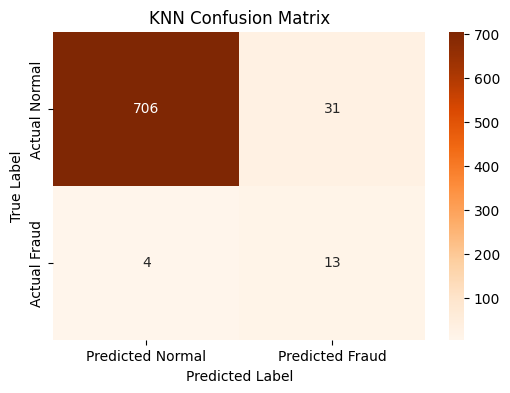

In [ ]:
# Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('KNN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Model KNN memiliki akurasi yang tinggi, tetapi kinerja dalam memprediksi data penipuan kurang optimal. Model cenderung menghasilkan banyak false positive (data normal yang diprediksi sebagai penipuan). Meskipun demikian, model cukup baik dalam menangkap sebagian besar data penipuan yang sebenarnya terjadi.

   **kesimpulan**



*   **Kesimpulan Perbandingan Model:**

1. **Kinerja Keseluruhan**:
   - *Random Forest* unggul dalam semua metrik (Accuracy 98.94%, ROC AUC 99.78%)
   - *KNN* memiliki kelemahan signifikan terutama dalam precision (29.55%)

2. **Deteksi Fraud (Recall)**:
   - RF: Deteksi 88.24% fraud (lebih baik)
   - KNN: Deteksi 76.47% fraud (lebih banyak fraud terlewat)

3. **False Alarm (Precision)**:
   - RF: 28.57% false alarm (lebih bisa diandalkan)
   - KNN: 70.45% false alarm (terlalu banyak alarm salah)

4. **Keseimbangan Model (F1-Score)**:
   - RF: 0.7895 (seimbang)
   - KNN: 0.4262 (tidak seimbang)

**Rekomendasi Final**:
- **Gunakan Random Forest** sebagai model utama:
  - Deteksi fraud lebih akurat
  - Lebih sedikit false alarm
  - Klasifikasi hampir sempurna (ROC AUC 99.78%)
  
- **Hindari KNN** untuk kasus ini karena:
  - Terlalu banyak false alarm
  - Lebih banyak fraud yang terlewat
  - Performa jauh di bawah RF
  
RF lebih baik dalam memprediksi fraud dan anomali

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:

 Random Forest:

Precision 71.43%: Masih 28.57% transaksi normal dikira fraud
Recall 88.24%: 11.76% fraud belum terdeteksi
Diagnosa: Trade-off precision-recall wajar untuk data imbalance

KNN:

Precision 29.55%: 70.45% false alarm (tidak acceptable)
Underfitting: Performa buruk karena data imbalance dan high dimensionalit

3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Gunakan EasyEnsemble untuk data imbalance ekstrim